In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("2009_-_2010_School_Progress_Reports_-_All_Schools_20250406.csv")
df.head()

,DBN,DISTRICT,SCHOOL,PRINCIPAL,PROGRESS REPORT TYPE,SCHOOL LEVEL*,PEER INDEX*,2009-2010 OVERALL GRADE,2009-2010 OVERALL SCORE,2009-2010 ENVIRONMENT CATEGORY SCORE,2009-2010 ENVIRONMENT GRADE,2009-2010 PERFORMANCE CATEGORY SCORE,2009-2010 PERFORMANCE GRADE,2009-2010 PROGRESS CATEGORY SCORE,2009-2010 PROGRESS GRADE,2009-2010 ADDITIONAL CREDIT,2008-09 PROGRESS REPORT GRADE
0,01M015,1,P.S. 015 Roberto Clemente,Thomas Staebell,EMS,Elementary,62.65,C,37.6,7.2,B,3.0,D,27.4,B,0.0,B
1,01M019,1,P.S. 019 Asher Levy,Jacqueline Flanagan,EMS,Elementary,48.94,C,35.7,6.4,B,4.9,D,24.4,B,0.0,A
2,01M020,1,P.S. 020 Anna Silver,James Lee,EMS,Elementary,57.68,A,70.3,9.3,A,7.9,C,44.1,A,9.0,A
3,01M034,1,P.S. 034 Franklin D. Roosevelt,Joyce Stallings Harte,EMS,K-8,66.75,B,53.0,6.8,B,7.4,C,33.0,B,5.8,A
4,01M063,1,P.S. 063 William McKinley,Darlene Despeignes,EMS,Elementary,57.55,B,54.0,7.8,B,7.1,C,35.8,A,3.3,B


In [3]:
print("Shape:", df.shape)
print("\nMissing Values:\n", df.isnull().sum())
df.describe(include='all')

Shape: (1677, 17)

Missing Values:
 DBN                                       0
DISTRICT                                  0
SCHOOL                                    0
PRINCIPAL                                 1
PROGRESS REPORT TYPE                      0
SCHOOL LEVEL*                             0
PEER INDEX*                              82
2009-2010 OVERALL GRADE                 143
2009-2010 OVERALL SCORE                 143
2009-2010 ENVIRONMENT CATEGORY SCORE    143
2009-2010 ENVIRONMENT GRADE             143
2009-2010 PERFORMANCE CATEGORY SCORE    143
2009-2010 PERFORMANCE GRADE             143
2009-2010 PROGRESS CATEGORY SCORE       143
2009-2010 PROGRESS GRADE                143
2009-2010 ADDITIONAL CREDIT             143
2008-09 PROGRESS REPORT GRADE           277
dtype: int64


,DBN,DISTRICT,SCHOOL,PRINCIPAL,PROGRESS REPORT TYPE,SCHOOL LEVEL*,PEER INDEX*,2009-2010 OVERALL GRADE,2009-2010 OVERALL SCORE,2009-2010 ENVIRONMENT CATEGORY SCORE,2009-2010 ENVIRONMENT GRADE,2009-2010 PERFORMANCE CATEGORY SCORE,2009-2010 PERFORMANCE GRADE,2009-2010 PROGRESS CATEGORY SCORE,2009-2010 PROGRESS GRADE,2009-2010 ADDITIONAL CREDIT,2008-09 PROGRESS REPORT GRADE
count,1677,1677.000000,1677,1676,1677,1677,1595.000000,1534,1534.000000,1534.000000,1534,1534.000000,1534,1534.000000,1534,1534.000000,1400
unique,1582,NaN,1581,1579,6,8,NaN,5,NaN,NaN,5,NaN,5,NaN,5,NaN,5
top,03M860,NaN,Riverdale / Kingsbridge Academy (Middle School...,Joanne Goubourn,EMS,Elementary,NaN,B,NaN,NaN,A,NaN,C,NaN,B,NaN,A
freq,2,NaN,2,2,1130,612,NaN,513,NaN,NaN,520,NaN,438,NaN,545,NaN,1041
mean,NaN,20.370304,NaN,NaN,NaN,NaN,25.163636,NaN,51.557106,8.096219,NaN,9.740222,NaN,30.498566,NaN,3.223077,NaN
std,NaN,19.451412,NaN,NaN,NaN,NaN,25.678914,NaN,18.557842,2.796088,NaN,5.738185,NaN,11.571854,NaN,2.941850,NaN
min,NaN,1.000000,NaN,NaN,NaN,NaN,1.240000,NaN,0.100000,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN
25%,NaN,9.000000,NaN,NaN,NaN,NaN,2.485000,NaN,38.325000,6.200000,NaN,5.400000,NaN,23.200000,NaN,0.800000,NaN
50%,NaN,16.000000,NaN,NaN,NaN,NaN,3.640000,NaN,51.300000,8.200000,NaN,8.800000,NaN,31.100000,NaN,2.500000,NaN
75%,NaN,26.000000,NaN,NaN,NaN,NaN,53.905000,NaN,64.500000,10.000000,NaN,13.600000,NaN,38.300000,NaN,5.000000,NaN


In [4]:
df = df.dropna(subset=['2009-2010 OVERALL GRADE'])  # Drop rows with missing grades
df = df.dropna()  # Drop rows with any missing data

# Map grades to numbers
grade_map = {'A': 4, 'B': 3, 'C': 2, 'D': 1, 'F': 0}
df['GRADE_NUM'] = df['2009-2010 OVERALL GRADE'].map(grade_map)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1400 entries, 0 to 1676
Data columns (total 20 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   DBN                                   1400 non-null   object  
 1   DISTRICT                              1400 non-null   int64   
 2   SCHOOL                                1400 non-null   object  
 3   PRINCIPAL                             1400 non-null   object  
 4   PROGRESS REPORT TYPE                  1400 non-null   object  
 5   SCHOOL LEVEL*                         1400 non-null   object  
 6   PEER INDEX*                           1400 non-null   float64 
 7   2009-2010 OVERALL GRADE               1400 non-null   category
 8   2009-2010 OVERALL SCORE               1400 non-null   float64 
 9   2009-2010 ENVIRONMENT CATEGORY SCORE  1400 non-null   float64 
 10  2009-2010 ENVIRONMENT GRADE           1400 non-null   object  
 11  2009-2010

In [41]:
df.describe()

,DISTRICT,PEER INDEX*,2009-2010 OVERALL SCORE,2009-2010 ENVIRONMENT CATEGORY SCORE,2009-2010 PERFORMANCE CATEGORY SCORE,2009-2010 PROGRESS CATEGORY SCORE,2009-2010 ADDITIONAL CREDIT,GRADE_NUM,GRADE_NUM_2008,GRADE_CHANGE
count,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000
mean,18.279286,26.680686,51.568357,8.035786,9.607643,30.728857,3.197143,2.848571,3.635714,-0.787143
std,15.975853,25.733923,18.601938,2.763599,5.691727,11.425917,2.947951,0.919916,0.712502,0.904507
min,1.000000,1.550000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.000000
25%,8.000000,2.537500,38.275000,6.200000,5.300000,23.375000,0.800000,2.000000,3.000000,-2.000000
50%,15.000000,15.860000,51.250000,8.100000,8.700000,31.400000,2.500000,3.000000,4.000000,-1.000000
75%,25.000000,54.830000,64.500000,9.925000,13.300000,38.400000,4.800000,4.000000,4.000000,0.000000
max,84.000000,74.030000,106.300000,15.000000,25.000000,60.000000,15.000000,4.000000,4.000000,3.000000


In [42]:
df.tail()

,DBN,DISTRICT,SCHOOL,PRINCIPAL,PROGRESS REPORT TYPE,SCHOOL LEVEL*,PEER INDEX*,2009-2010 OVERALL GRADE,2009-2010 OVERALL SCORE,2009-2010 ENVIRONMENT CATEGORY SCORE,2009-2010 ENVIRONMENT GRADE,2009-2010 PERFORMANCE CATEGORY SCORE,2009-2010 PERFORMANCE GRADE,2009-2010 PROGRESS CATEGORY SCORE,2009-2010 PROGRESS GRADE,2009-2010 ADDITIONAL CREDIT,2008-09 PROGRESS REPORT GRADE,GRADE_NUM,GRADE_NUM_2008,GRADE_CHANGE
1672,84X705,84,Family Life Academy Charter School,Marilyn Calo,EMS,Elementary,59.65,B,44.5,11.9,A,9.1,C,23.5,C,0.0,A,3,4,-1
1673,84X706,84,Harriet Tubman Charter School,Cleveland Person,EMS,K-8,46.54,C,35.1,7.0,B,2.4,F,24.9,B,0.8,C,2,2,0
1674,84X717,84,Carl C. Icahn Charter School,Daniel Garcia,EMS,K-8,52.22,B,53.5,11.2,A,16.5,A,25.8,B,0.0,A,3,4,-1
1675,84X718,84,Bronx Charter School for Better Learning,Richard E. Burke,EMS,Elementary,49.34,C,33.9,9.5,A,5.7,D,17.9,C,0.8,D,2,1,1
1676,84X730,84,Bronx Charter School for Arts,Ryan Schetelick,EMS,Elementary,56.67,B,43.7,7.3,B,6.8,C,26.6,B,3.0,A,3,4,-1


In [43]:
df.isnull().sum()

DBN                                     0
DISTRICT                                0
SCHOOL                                  0
PRINCIPAL                               0
PROGRESS REPORT TYPE                    0
SCHOOL LEVEL*                           0
PEER INDEX*                             0
2009-2010 OVERALL GRADE                 0
2009-2010 OVERALL SCORE                 0
2009-2010 ENVIRONMENT CATEGORY SCORE    0
2009-2010 ENVIRONMENT GRADE             0
2009-2010 PERFORMANCE CATEGORY SCORE    0
2009-2010 PERFORMANCE GRADE             0
2009-2010 PROGRESS CATEGORY SCORE       0
2009-2010 PROGRESS GRADE                0
2009-2010 ADDITIONAL CREDIT             0
2008-09 PROGRESS REPORT GRADE           0
GRADE_NUM                               0
GRADE_NUM_2008                          0
GRADE_CHANGE                            0
dtype: int64

In [44]:
df.duplicated().sum()

np.int64(0)

In [37]:
# 1. Total number of schools
print("1. Total schools:", len(df))

1. Total schools: 1400


In [6]:
# 2. Number of schools with A grade
print("2. Schools with 'A' grade:", (df['2009-2010 OVERALL GRADE'] == 'A').sum())

2. Schools with 'A' grade: 402


In [7]:
print("3. Schools by grade:")
print(df['2009-2010 OVERALL GRADE'].value_counts())

3. Schools by grade:
2009-2010 OVERALL GRADE
B    471
C    453
A    402
D     61
F     13
Name: count, dtype: int64


In [8]:
print("\n4. Schools by level:")
print(df['SCHOOL LEVEL*'].value_counts())


4. Schools by level:
SCHOOL LEVEL*
Elementary              583
Middle                  328
High School             310
K-8                     147
High School Transfer     32
Name: count, dtype: int64


In [9]:
print("\n5. Average overall score: {:.2f}".format(df['2009-2010 OVERALL SCORE'].mean()))


5. Average overall score: 51.57


In [10]:
print("\n6. Top 10 schools by overall score:")
print(df[['SCHOOL', '2009-2010 OVERALL SCORE']].sort_values(by='2009-2010 OVERALL SCORE', ascending=False).head(10))



6. Top 10 schools by overall score:
                                                SCHOOL  \
519             Theatre Arts Production Company School   
801               P.S. 172 Beacon School of Excellence   
719  Brooklyn International High School at Water's ...   
770                    Williamsburg Preparatory School   
493                                   P.S. 032 Belmont   
567  Marble Hill High School for International Studies   
769  Williamsburg High School for Architecture and ...   
741                          P.S. 031 Samuel F. Dupont   
104                          Manhattan Village Academy   
484                   High School for Violin and Dance   

     2009-2010 OVERALL SCORE  
519                    106.3  
801                    105.1  
719                    103.0  
770                    101.7  
493                    100.6  
567                    100.5  
769                    100.2  
741                     97.4  
104                     96.6  
484           

In [11]:
print("\n7. Bottom 10 schools by overall score:")
print(df[['SCHOOL', '2009-2010 OVERALL SCORE']].sort_values(by='2009-2010 OVERALL SCORE').head(10))


7. Bottom 10 schools by overall score:
                                           SCHOOL  2009-2010 OVERALL SCORE
1634           Ross Global Academy Charter School                      0.1
1135  Brooklyn Collegiate: A College Board School                      4.4
1387                  P.S. 118 Lorraine Hansberry                      5.1
1505                      P.S. 055 Henry M. Boehm                      5.7
370                                      P.S. 107                      6.3
603         Cornerstone Academy for Social Action                      7.6
395    Urban Assembly Academy of Civic Engagement                      7.9
272                   P.S. 115 Alexander Humboldt                      9.3
619                           School of Diplomacy                     10.1
1641                    Harlem Day Charter School                     10.2


In [12]:
#School with highest progress category score
top_progress = df.loc[df['2009-2010 PROGRESS CATEGORY SCORE'].idxmax()]
print("\n. School with highest progress score:", top_progress['SCHOOL'], "-", top_progress['2009-2010 PROGRESS CATEGORY SCORE'])


. School with highest progress score: P.S. 025 Bilingual School - 60.0


In [13]:
#School with highest environment score
top_env = df.loc[df['2009-2010 ENVIRONMENT CATEGORY SCORE'].idxmax()]
print("\n. School with highest environment score:", top_env['SCHOOL'], "-", top_env['2009-2010 ENVIRONMENT CATEGORY SCORE'])



. School with highest environment score: Independence High School - 15.0


In [14]:
#Top 5 principals by average score
print("\n10. Top 5 principals by average school score:")
print(df.groupby('PRINCIPAL')['2009-2010 OVERALL SCORE'].mean().sort_values(ascending=False).head(5))


10. Top 5 principals by average school score:
PRINCIPAL
Jack Spatola       105.1
Pamela Taranto     103.0
Kathleen Elvin     101.7
Esther Schwartz    100.6
Kirsten Larson     100.5
Name: 2009-2010 OVERALL SCORE, dtype: float64


### What is the distribution of overall grades?

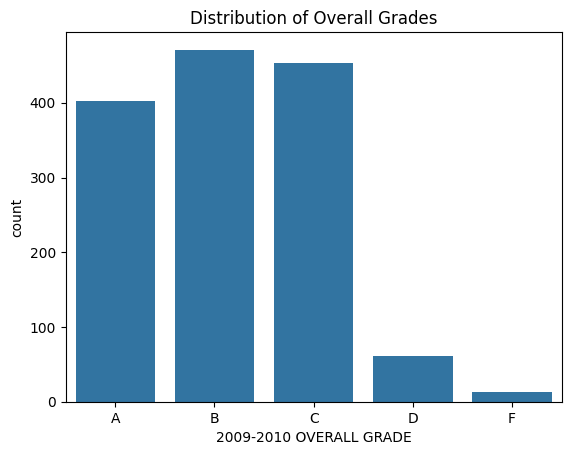

In [15]:
sns.countplot(data=df, x='2009-2010 OVERALL GRADE', order=['A','B','C','D','F'])
plt.title("Distribution of Overall Grades")
plt.show()


### What is the distribution of school levels?

C:\Users\rohan\AppData\Local\Temp\ipykernel_12196\1471774652.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='SCHOOL LEVEL*', palette='muted')


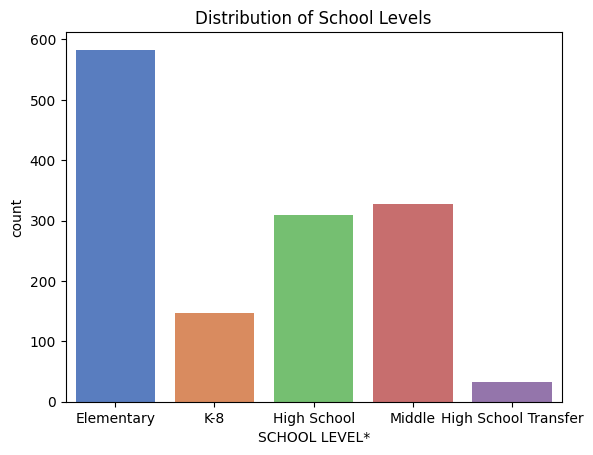

In [16]:
sns.countplot(data=df, x='SCHOOL LEVEL*', palette='muted')
plt.title("Distribution of School Levels")
plt.show()


###  How many schools per district?

C:\Users\rohan\AppData\Local\Temp\ipykernel_12196\2086066308.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='DISTRICT', palette='viridis')


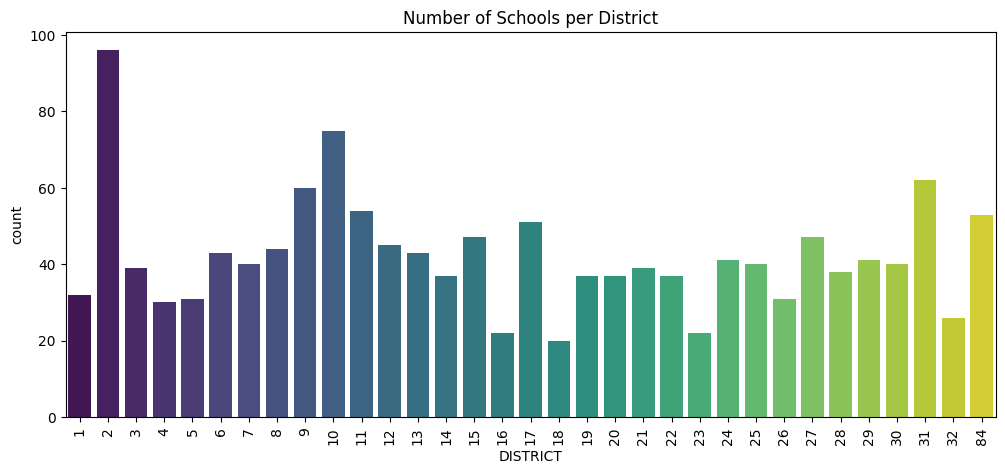

In [17]:
plt.figure(figsize=(12, 5))
sns.countplot(data=df, x='DISTRICT', palette='viridis')
plt.title("Number of Schools per District")
plt.xticks(rotation=90)
plt.show()


### Which districts have the highest average overall scores?

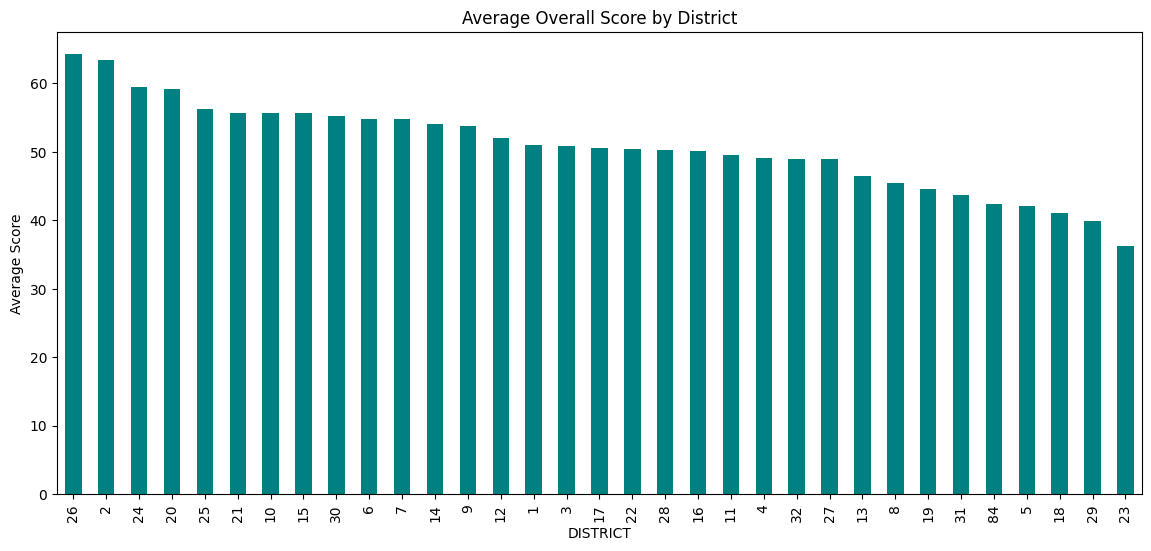

In [18]:
avg_scores = df.groupby('DISTRICT')['2009-2010 OVERALL SCORE'].mean().sort_values(ascending=False)
avg_scores.plot(kind='bar', figsize=(14, 6), color='teal')
plt.title("Average Overall Score by District")
plt.ylabel("Average Score")
plt.show()


### What's the correlation between all score metrics?

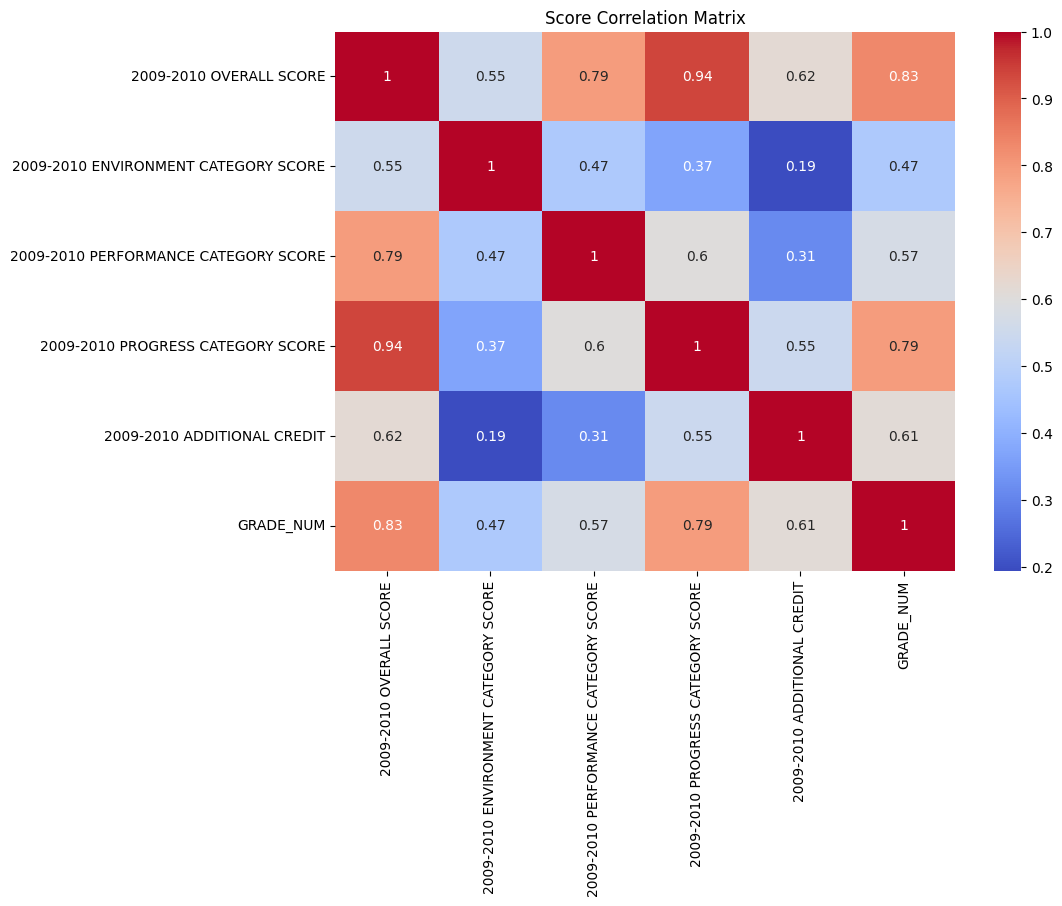

In [19]:
score_cols = [col for col in df.columns if 'SCORE' in col or 'CREDIT' in col]
corr = df[score_cols + ['GRADE_NUM']].corr()

plt.figure(figsize=(10, 7))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Score Correlation Matrix")
plt.show()


### What does the overall score distribution look like?

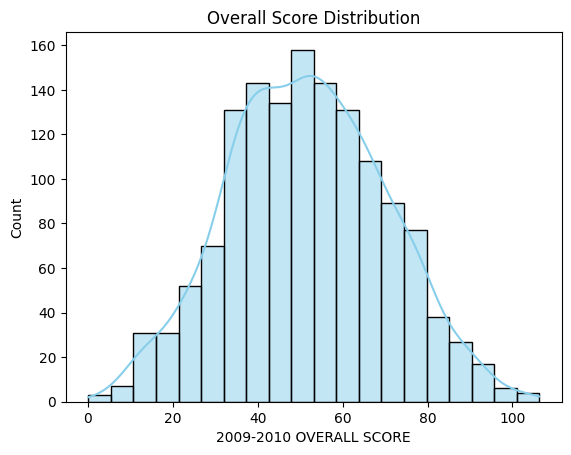

In [20]:
sns.histplot(df['2009-2010 OVERALL SCORE'], bins=20, kde=True, color='skyblue')
plt.title("Overall Score Distribution")
plt.show()


### How does performance score relate to overall grade?

C:\Users\rohan\AppData\Local\Temp\ipykernel_12196\3252090359.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='2009-2010 OVERALL GRADE', y='2009-2010 PERFORMANCE CATEGORY SCORE', palette='pastel')


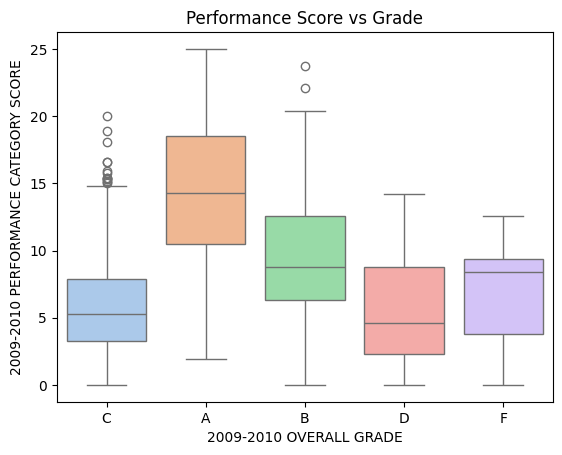

In [21]:
sns.boxplot(data=df, x='2009-2010 OVERALL GRADE', y='2009-2010 PERFORMANCE CATEGORY SCORE', palette='pastel')
plt.title("Performance Score vs Grade")
plt.show()


### How does progress score vary across school levels?

C:\Users\rohan\AppData\Local\Temp\ipykernel_12196\3589906601.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='SCHOOL LEVEL*', y='2009-2010 PROGRESS CATEGORY SCORE', palette='Set2')


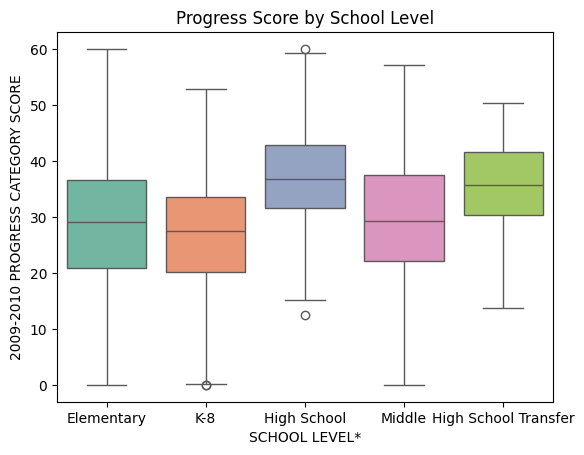

In [22]:
sns.boxplot(data=df, x='SCHOOL LEVEL*', y='2009-2010 PROGRESS CATEGORY SCORE', palette='Set2')
plt.title("Progress Score by School Level")
plt.show()


### Do environment scores impact grades?

C:\Users\rohan\AppData\Local\Temp\ipykernel_12196\1649237614.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='2009-2010 OVERALL GRADE', y='2009-2010 ENVIRONMENT CATEGORY SCORE', palette='Set1')


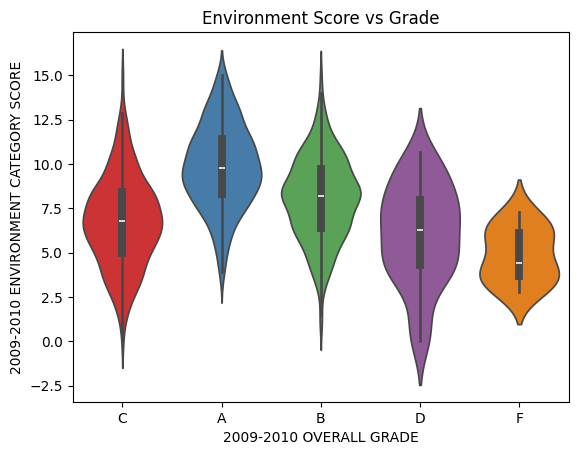

In [23]:
sns.violinplot(data=df, x='2009-2010 OVERALL GRADE', y='2009-2010 ENVIRONMENT CATEGORY SCORE', palette='Set1')
plt.title("Environment Score vs Grade")
plt.show()


### Scatter plot of Environment vs Progress Scores

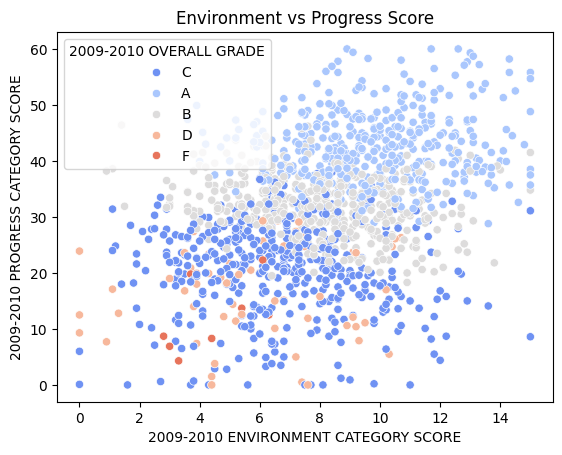

In [24]:
sns.scatterplot(data=df, x='2009-2010 ENVIRONMENT CATEGORY SCORE', y='2009-2010 PROGRESS CATEGORY SCORE',
                hue='2009-2010 OVERALL GRADE', palette='coolwarm')
plt.title("Environment vs Progress Score")
plt.show()


### Do better grades get higher additional credit?

C:\Users\rohan\AppData\Local\Temp\ipykernel_12196\277029612.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='2009-2010 OVERALL GRADE', y='2009-2010 ADDITIONAL CREDIT', palette='cool')


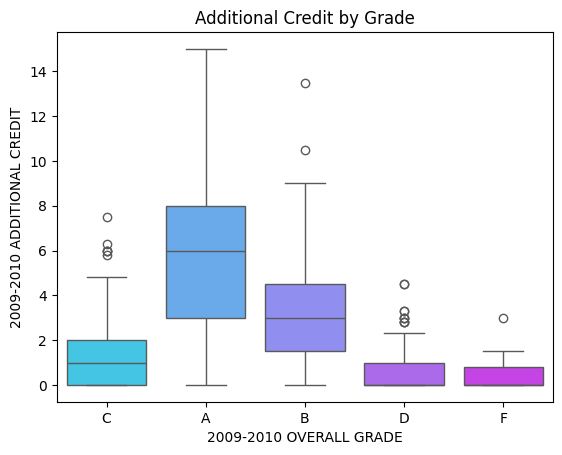

In [25]:
sns.boxplot(data=df, x='2009-2010 OVERALL GRADE', y='2009-2010 ADDITIONAL CREDIT', palette='cool')
plt.title("Additional Credit by Grade")
plt.show()


### Compare 2008-09 and 2009-10 Grades

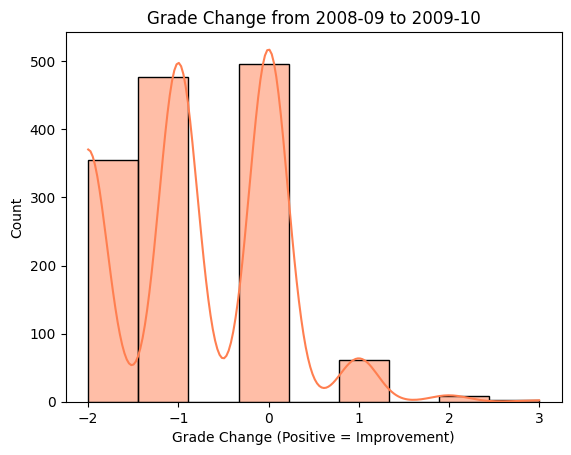

In [26]:
df['GRADE_NUM_2008'] = df['2008-09 PROGRESS REPORT GRADE'].map(grade_map)
df['GRADE_CHANGE'] = df['GRADE_NUM'] - df['GRADE_NUM_2008']
sns.histplot(df['GRADE_CHANGE'], bins=9, kde=True, color='coral')
plt.title("Grade Change from 2008-09 to 2009-10")
plt.xlabel("Grade Change (Positive = Improvement)")
plt.show()


### Top 10 schools by overall score

C:\Users\rohan\AppData\Local\Temp\ipykernel_12196\405846879.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='2009-2010 OVERALL SCORE', y='SCHOOL', data=top_schools, palette='Blues_d')


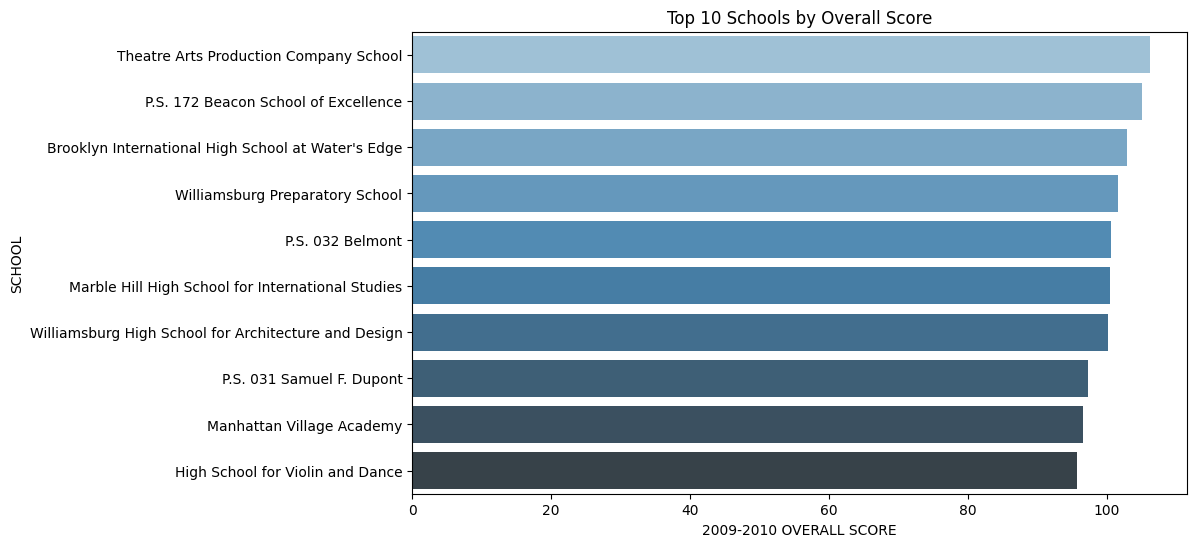

In [27]:
top_schools = df.sort_values(by='2009-2010 OVERALL SCORE', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='2009-2010 OVERALL SCORE', y='SCHOOL', data=top_schools, palette='Blues_d')
plt.title("Top 10 Schools by Overall Score")
plt.show()


### Which principals have the highest average scores?

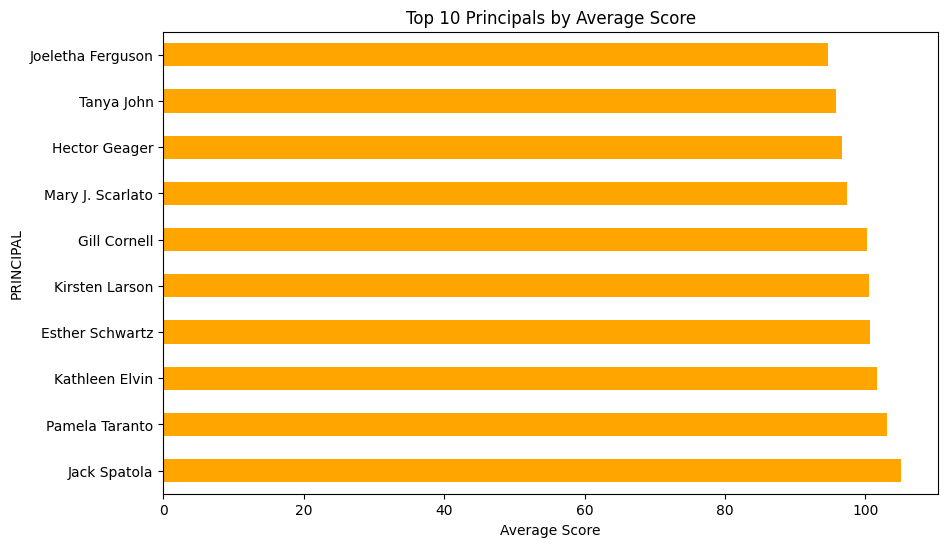

In [28]:
top_principals = df.groupby('PRINCIPAL')['2009-2010 OVERALL SCORE'].mean().sort_values(ascending=False).head(10)
top_principals.plot(kind='barh', figsize=(10, 6), color='orange')
plt.title("Top 10 Principals by Average Score")
plt.xlabel("Average Score")
plt.show()


### Do peer index scores correlate with final grade?

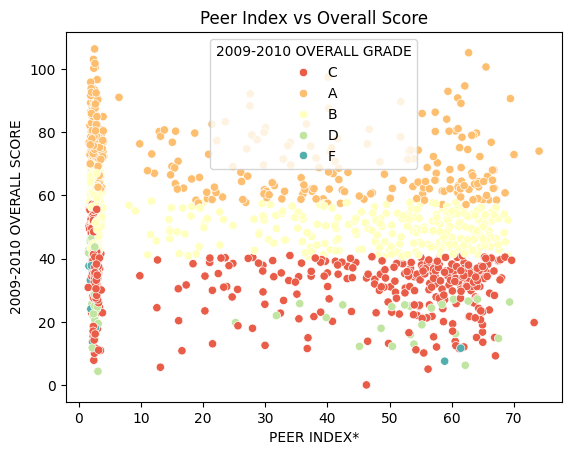

In [29]:
sns.scatterplot(data=df, x='PEER INDEX*', y='2009-2010 OVERALL SCORE', hue='2009-2010 OVERALL GRADE', palette='Spectral')
plt.title("Peer Index vs Overall Score")
plt.show()


### Overall Score vs Peer Index

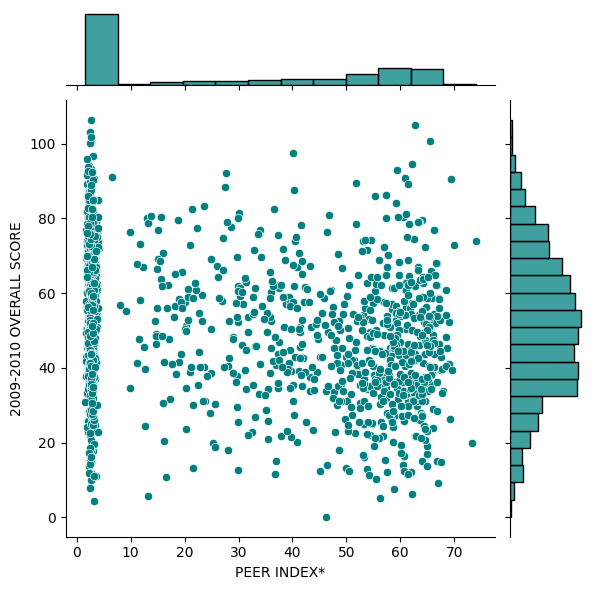

In [30]:
sns.jointplot(
    data=df,
    x='PEER INDEX*',
    y='2009-2010 OVERALL SCORE',
    kind='scatter',
    height=6,
    color='teal'
)

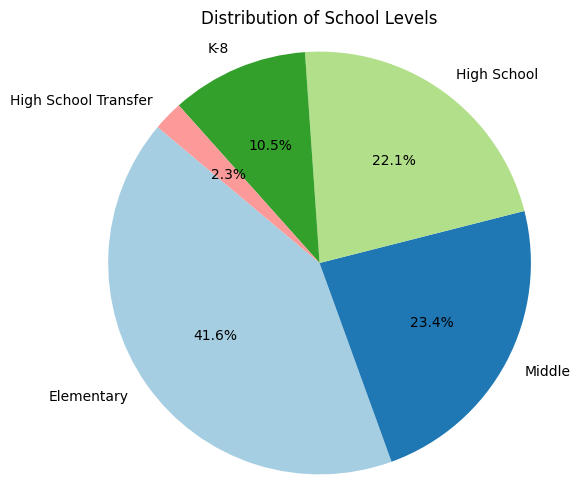

In [31]:
level_counts = df['SCHOOL LEVEL*'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(level_counts, labels=level_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title("Distribution of School Levels")
plt.axis('equal')
plt.show()

C:\Users\rohan\AppData\Local\Temp\ipykernel_12196\138211427.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grade_avg = df.groupby('2009-2010 OVERALL GRADE')['2009-2010 OVERALL SCORE'].mean().reset_index()


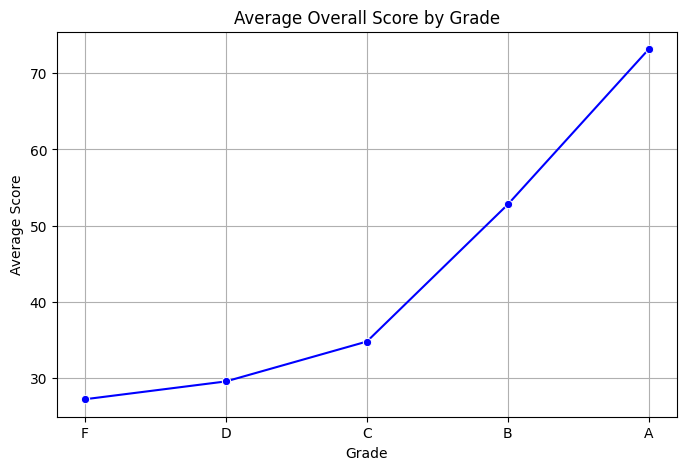

In [32]:
# Convert grade to ordered category for sorting
grade_order = ['F', 'D', 'C', 'B', 'A']
df['2009-2010 OVERALL GRADE'] = pd.Categorical(df['2009-2010 OVERALL GRADE'], categories=grade_order, ordered=True)

# Group by grade
grade_avg = df.groupby('2009-2010 OVERALL GRADE')['2009-2010 OVERALL SCORE'].mean().reset_index()

# Plot
plt.figure(figsize=(8, 5))
sns.lineplot(data=grade_avg, x='2009-2010 OVERALL GRADE', y='2009-2010 OVERALL SCORE', marker='o', color='blue')
plt.title("Average Overall Score by Grade")
plt.xlabel("Grade")
plt.ylabel("Average Score")
plt.grid(True)
plt.show()

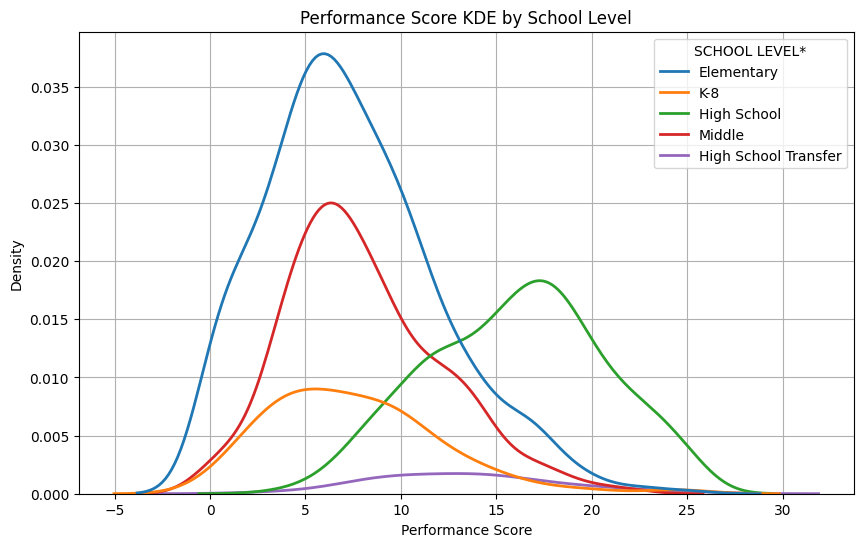

In [33]:
#KDE Plot with Multiple Overlays
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='2009-2010 PERFORMANCE CATEGORY SCORE', hue='SCHOOL LEVEL*', fill=False, linewidth=2)
plt.title("Performance Score KDE by School Level")
plt.xlabel("Performance Score")
plt.ylabel("Density")
plt.grid(True)
plt.show()

Text(0.5, 0.98, 'Linear Fit: Environment Score vs Overall Score by School Level')

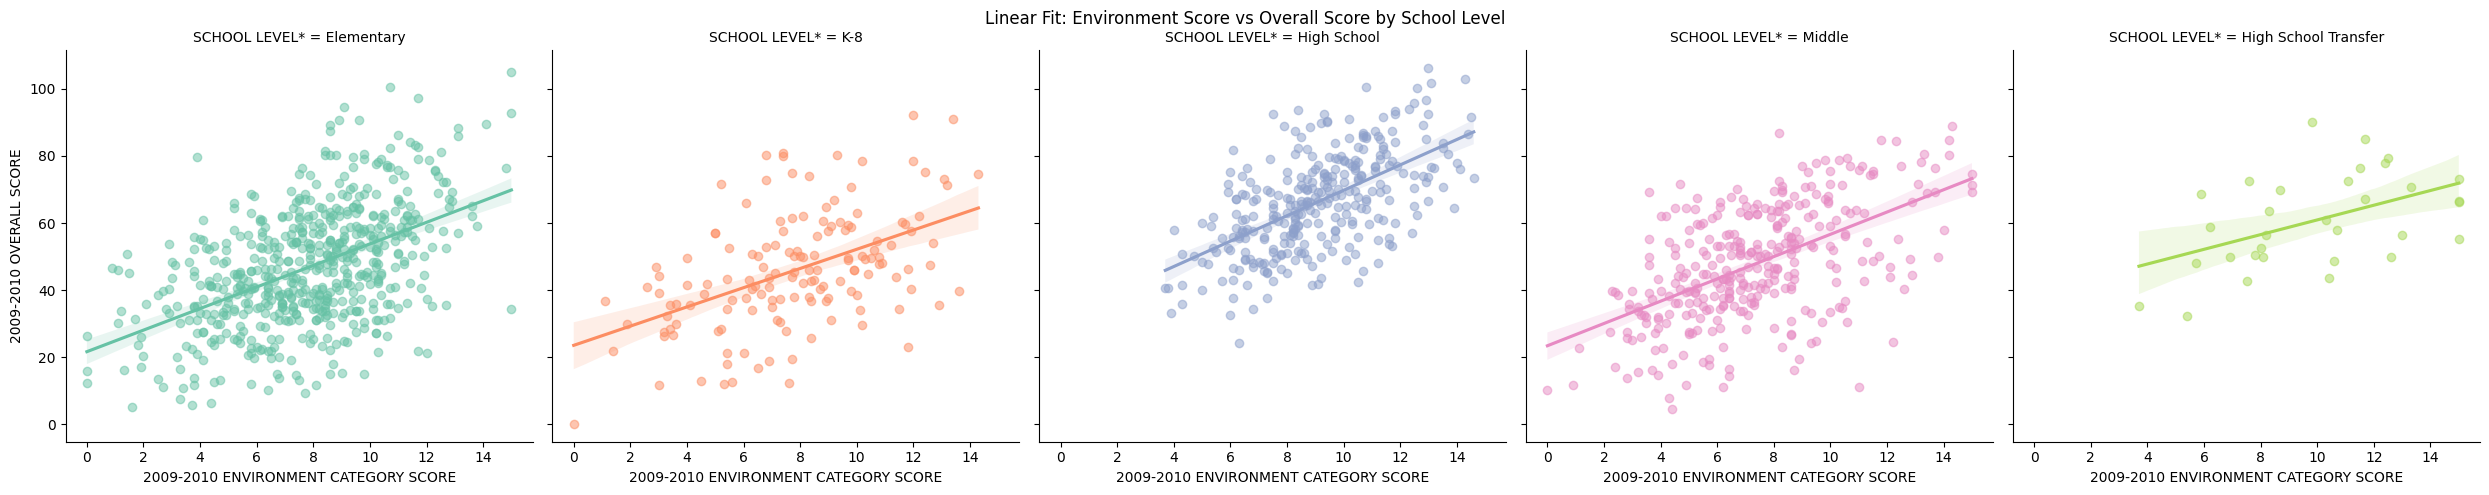

In [34]:
sns.lmplot(
    data=df,
    x='2009-2010 ENVIRONMENT CATEGORY SCORE',
    y='2009-2010 OVERALL SCORE',
    col='SCHOOL LEVEL*',
    hue='SCHOOL LEVEL*',
    height=5,
    aspect=1,
    scatter_kws={'alpha': 0.5},
    palette='Set2'
)

plt.subplots_adjust(top=0.9)
plt.suptitle("Linear Fit: Environment Score vs Overall Score by School Level")

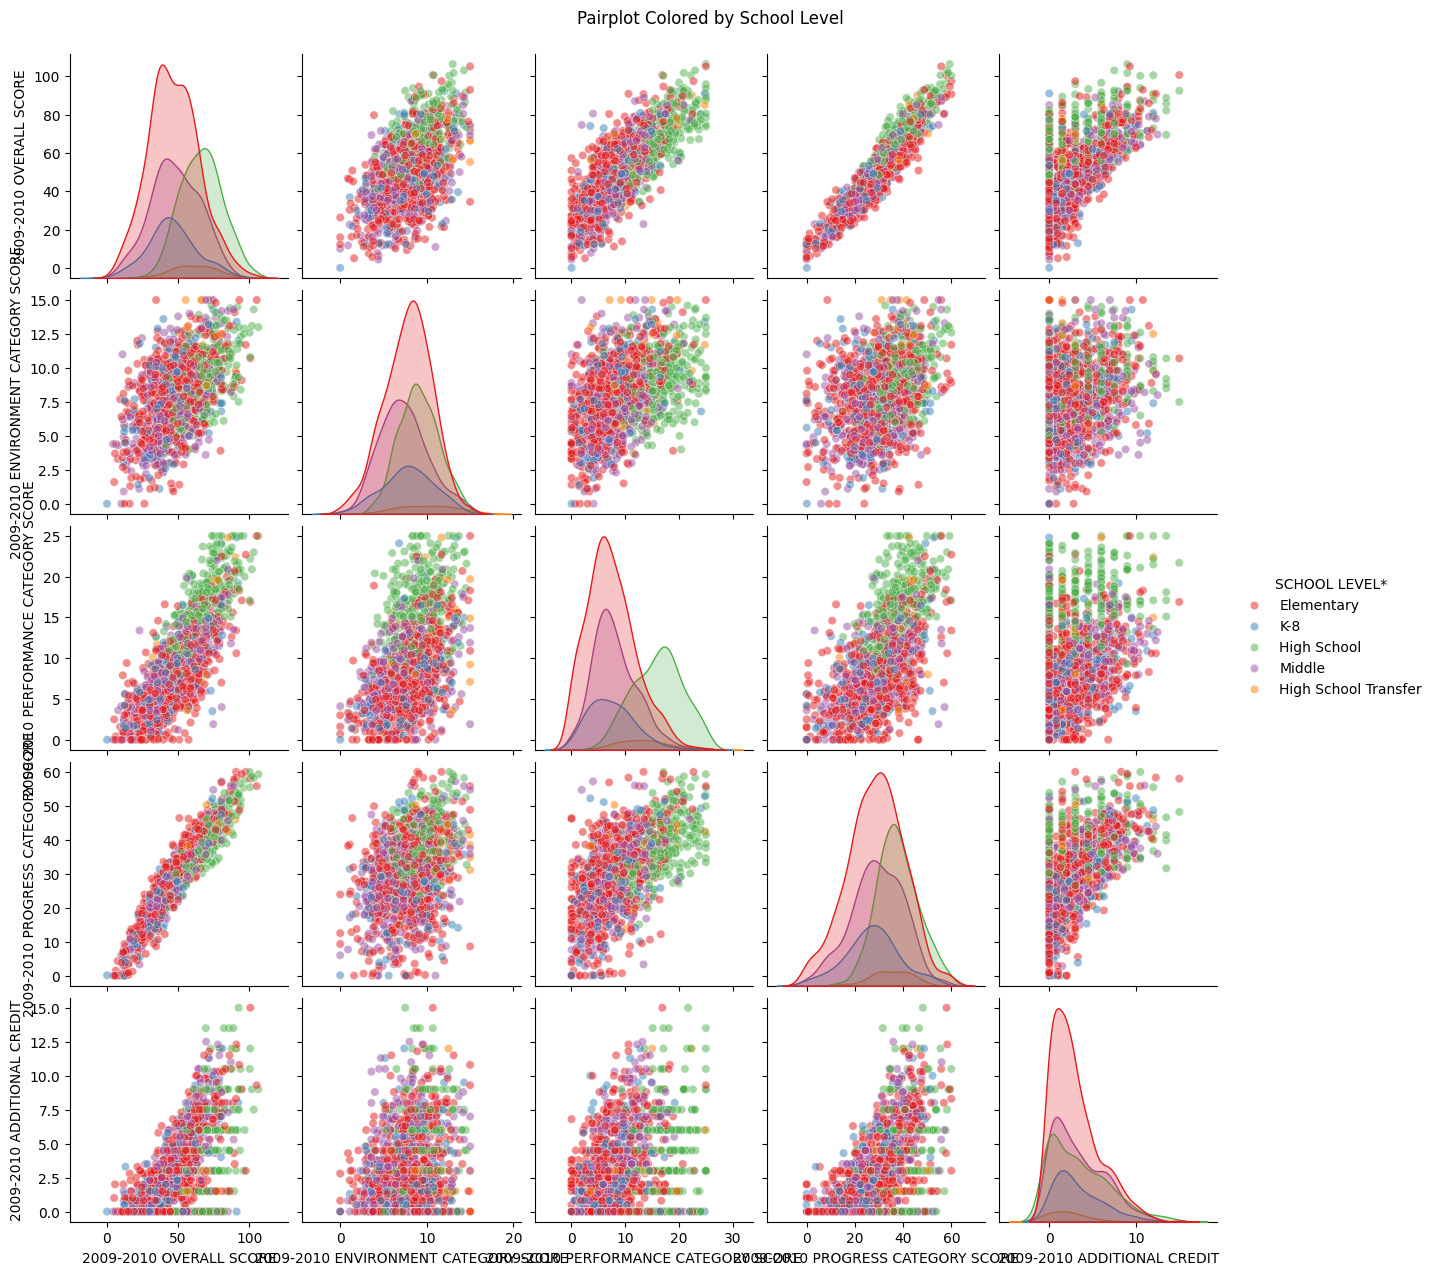

In [35]:
sns.pairplot(
    data=df,
    vars=score_cols,
    hue='SCHOOL LEVEL*',
    palette='Set1',
    diag_kind='kde',  # Change to 'hist' if preferred
    plot_kws={'alpha': 0.5}
)
plt.suptitle("Pairplot Colored by School Level", y=1.02)
plt.show()

In [46]:
from scipy import stats
# Sample data (replace this with your actual DataFrame)
data = {
    'PEER INDEX*': [62.65, 48.94, 57.68, 66.75],
    '2009-2010 ENVIRONMENT CATEGORY SCORE': [37.6, 35.7, 70.3, 53.0],
    '2009-2010 PERFORMANCE CATEGORY SCORE': [3.0, 4.9, 7.9, 7.4],
    '2009-2010 PROGRESS CATEGORY SCORE': [27.4, 24.4, 44.1, 33.0],
    '2009-2010 ADDITIONAL CREDIT': [0.0, 0.0, 9.0, 5.8]
}
df = pd.DataFrame(data)
# Select numeric columns to check for outliers
selected_columns = [
    '2009-2010 ENVIRONMENT CATEGORY SCORE',
    '2009-2010 PERFORMANCE CATEGORY SCORE',
    '2009-2010 PROGRESS CATEGORY SCORE',
    '2009-2010 ADDITIONAL CREDIT'
]
# Calculate Z-scores
z_scores = np.abs(stats.zscore(df[selected_columns]))
# Set threshold for outlier detection
threshold = 3
# Find rows where any column has a Z-score above threshold
outliers = (z_scores > threshold).any(axis=1)
# Remove those rows
df_cleaned = df[~outliers].reset_index(drop=True)
print("Original Data:")
print(df)
print("\nCleaned Data (Outliers Removed):")
print(df_cleaned)

Original Data:
   PEER INDEX*  2009-2010 ENVIRONMENT CATEGORY SCORE  \
0        62.65                                  37.6   
1        48.94                                  35.7   
2        57.68                                  70.3   
3        66.75                                  53.0   

   2009-2010 PERFORMANCE CATEGORY SCORE  2009-2010 PROGRESS CATEGORY SCORE  \
0                                   3.0                               27.4   
1                                   4.9                               24.4   
2                                   7.9                               44.1   
3                                   7.4                               33.0   

   2009-2010 ADDITIONAL CREDIT  
0                          0.0  
1                          0.0  
2                          9.0  
3                          5.8  

Cleaned Data (Outliers Removed):
   PEER INDEX*  2009-2010 ENVIRONMENT CATEGORY SCORE  \
0        62.65                                  37.6   
1 